In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales_data = pd.read_csv('/Users/saifpatel/Downloads/Unified Mentor/Amazon Sales data.csv')
sales_data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
print(sales_data.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [5]:
print(sales_data.dtypes)

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object


# Month-wise Sales Trend

In [6]:
# Convert 'Order Date' to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Extract month from 'Order Date'
sales_data['Order Month'] = sales_data['Order Date'].dt.month

# Group by month and sum the 'Total Revenue' for each month
monthly_sales = sales_data.groupby('Order Month')['Total Revenue'].sum()

print("Month-wise Sales Trend:")
print(monthly_sales)

Month-wise Sales Trend:
Order Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64


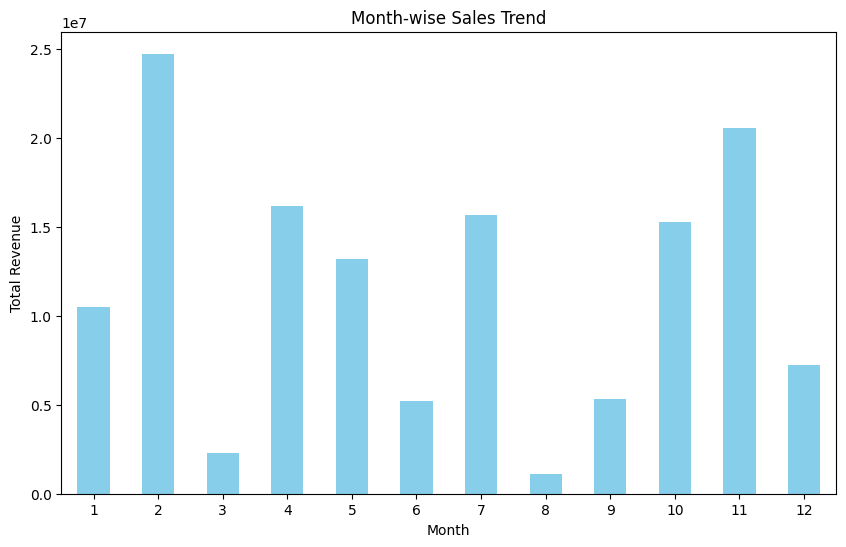

In [7]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Order Month'] = sales_data['Order Date'].dt.month
monthly_sales = sales_data.groupby('Order Month')['Total Revenue'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

Peaks: February, April, and November have the highest revenues.

Lows: March and August show the lowest revenues.

General Trend: There are significant fluctuations throughout the year, with no clear seasonal trend. There are sharp increases followed by sharp declines at various points.

These observations indicate that the revenue experiences significant variability month-to-month without a clear pattern of seasonality.

# Year-wise sales trend

In [8]:
# Extract year from 'Order Date'
sales_data['Order Year'] = sales_data['Order Date'].dt.year

# Group by year and sum the 'Total Revenue' for each year
yearly_sales = sales_data.groupby('Order Year')['Total Revenue'].sum()

print("\nYear-wise Sales Trend:")
print(yearly_sales)


Year-wise Sales Trend:
Order Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


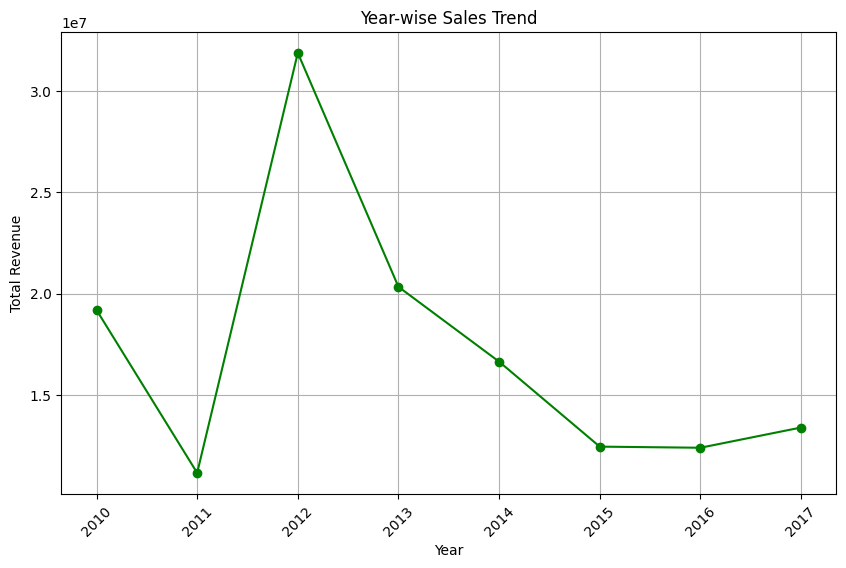

In [9]:
# Extract year from 'Order Date'
sales_data['Order Year'] = sales_data['Order Date'].dt.year

# Group by year and sum 'Total Revenue' for each year
yearly_sales = sales_data.groupby('Order Year')['Total Revenue'].sum()

# Plot the Year-wise Sales Trend
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o', color='green')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Peak: The highest revenue was in 2012.

Low Points: The lowest revenues were in 2011 and 2015.

General Trend: There is a significant fluctuation with a peak in 2012 followed by a continuous decline until 2015. After 2015, the revenue stabilizes at a lower level with a slight increase in 2017.

These observations indicate that while there was a significant rise in revenue in 2012, the subsequent years saw a steady decline, with a slight recovery towards the end of the period.

# Yearly-Month-wise Sales Trend

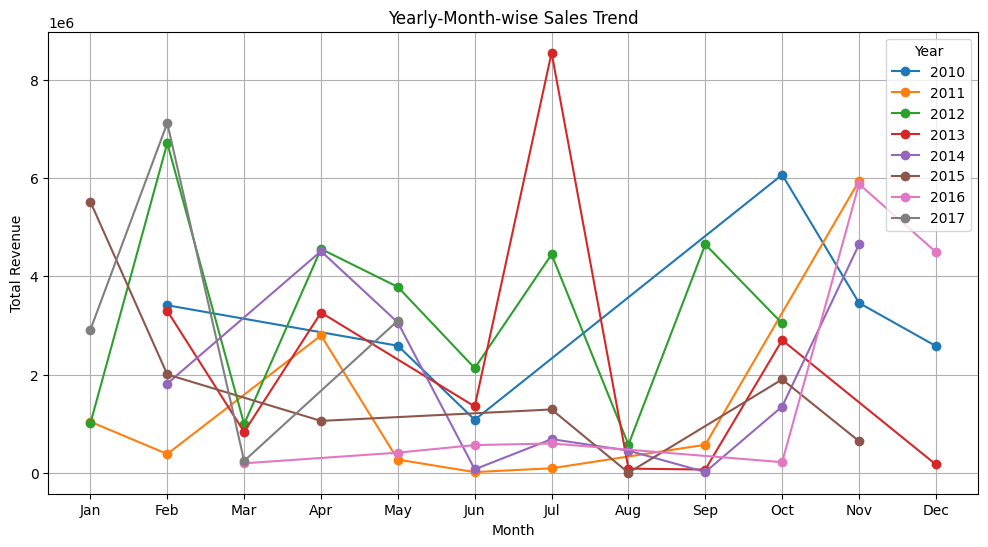

In [10]:
# Extract year and month from 'Order Date'
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month

# Group by year and month and sum 'Total Revenue' for each year-month combination
yearly_monthly_sales = sales_data.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

# Plot the Yearly-Month-wise Sales Trend
plt.figure(figsize=(12, 6))
for year in yearly_monthly_sales['Year'].unique():
    data_year = yearly_monthly_sales[yearly_monthly_sales['Year'] == year]
    plt.plot(data_year['Month'], data_year['Total Revenue'], label=year, marker='o')

plt.title('Yearly-Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()

1. There is a consistent pattern across all years, where sales peak around the middle of the year (typically around June or July) and dip during the beginning and end of the year.

2. The overall sales trend appears cyclical, with annual peaks and troughs following a similar pattern each year, suggesting a seasonal nature of the business.

3. The highest peak in sales seems to occur in 2013, while the lowest sales appear to be in 2010 and 2011.
 
4. There is considerable variation in sales performance across different months within each year, indicating significant monthly fluctuations in revenue.

5. The overall trend suggests a slight increase in sales from 2010 to 2017, although the pattern is not consistently upward or downward across all years.


In [11]:
print(yearly_monthly_sales)

    Year  Month  Total Revenue
0   2010      2     3410661.12
1   2010      5     2587973.26
2   2010      6     1082418.40
3   2010     10     6064933.75
4   2010     11     3458252.00
5   2010     12     2581786.39
6   2011      1     1042225.35
7   2011      2      387002.20
8   2011      4     2798046.49
9   2011      5      272410.45
10  2011      6       19103.44
11  2011      7       97040.64
12  2011      9      574951.92
13  2011     11     5938385.58
14  2012      1     1012884.00
15  2012      2     6707849.42
16  2012      3      994765.42
17  2012      4     4556012.38
18  2012      5     3782781.82
19  2012      6     2132075.27
20  2012      7     4445093.92
21  2012      8      576782.80
22  2012      9     4648152.72
23  2012     10     3042246.77
24  2013      2     3296425.02
25  2013      3      835759.10
26  2013      4     3262562.10
27  2013      6     1352867.40
28  2013      7     8545511.20
29  2013      8       89623.98
30  2013      9       71253.21
31  2013

# Key Metrics and Relationships

In [12]:
# Calculate key metrics
average_unit_price = sales_data['Unit Price'].mean()
average_unit_cost = sales_data['Unit Cost'].mean()

# Calculate average profit margin
sales_data['Profit Margin'] = (sales_data['Total Revenue'] - sales_data['Total Cost']) / sales_data['Total Revenue']
average_profit_margin = sales_data['Profit Margin'].mean()

print("\nKey Metrics:")
print(f"Average Unit Price: {average_unit_price:.2f}")
print(f"Average Unit Cost: {average_unit_cost:.2f}")
print(f"Average Profit Margin: {average_profit_margin:.2%}")


Key Metrics:
Average Unit Price: 276.76
Average Unit Cost: 191.05
Average Profit Margin: 36.21%


In [13]:
# Select numerical columns for correlation matrix
numeric_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Subset the DataFrame to include only numerical columns
numeric_data = sales_data[numeric_columns]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  \
Units Sold       1.000000   -0.070486  -0.092232       0.447784    0.374746   
Unit Price      -0.070486    1.000000   0.987270       0.752360    0.787905   
Unit Cost       -0.092232    0.987270   1.000000       0.715623    0.774895   
Total Revenue    0.447784    0.752360   0.715623       1.000000    0.983928   
Total Cost       0.374746    0.787905   0.774895       0.983928    1.000000   
Total Profit     0.564550    0.557365   0.467214       0.897327    0.804091   

               Total Profit  
Units Sold         0.564550  
Unit Price         0.557365  
Unit Cost          0.467214  
Total Revenue      0.897327  
Total Cost         0.804091  
Total Profit       1.000000  


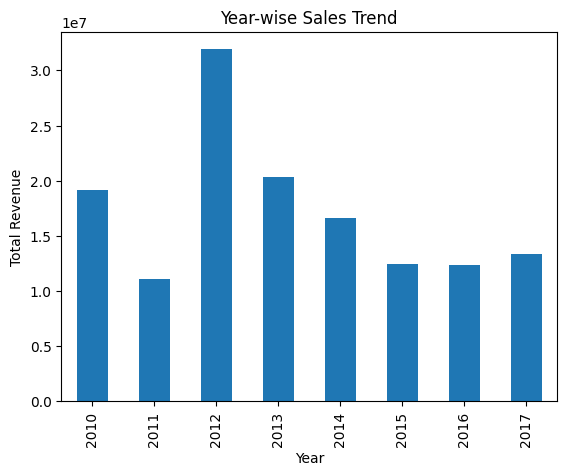

In [14]:
yearly_sales.plot(kind='bar', xlabel='Year', ylabel='Total Revenue', title='Year-wise Sales Trend')
plt.show()

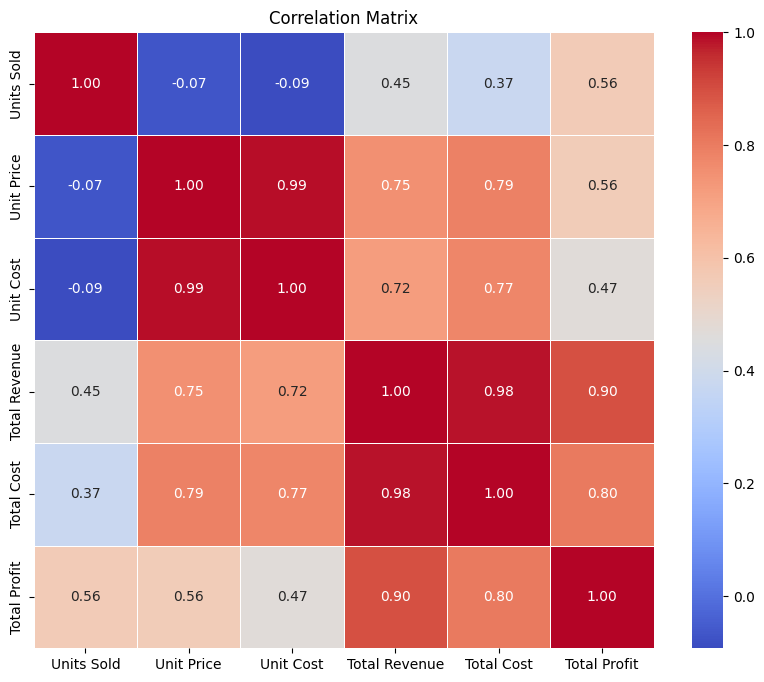

In [15]:
# Plotting correlation matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. There is a perfect positive correlation (1.0) between units sold and total revenue, indicating that an increase in units sold directly translates to an increase in total revenue.

2. There is also a strong positive correlation (0.98) between total revenue and total cost, suggesting that higher revenue is associated with higher costs.

3. Total profit has a strong positive correlation with total revenue (0.90) and a moderately strong correlation with total cost (0.80), implying that both revenue and cost impact profitability.

4. Unit price and unit cost have a very high positive correlation (0.99), indicating that an increase in unit price is typically accompanied by an increase in unit cost.

5. Units sold has a weak negative correlation with unit price (-0.07) and unit cost (-0.09), suggesting that as the number of units sold increases, the unit price and unit cost tend to decrease slightly.

6. Total revenue has a moderate positive correlation with unit price (0.75) and unit cost (0.72), indicating that higher prices and costs are associated with higher revenue to some extent.

7. Total cost has a moderate positive correlation with unit price (0.79) and unit cost (0.77), suggesting that higher prices and costs contribute to higher total costs.


In [16]:
# Group by 'Order Date' and sum 'Total Revenue' for each day
daily_sales = sales_data.groupby('Order Date')['Total Revenue'].sum()

In [17]:
# Sort the daily sales in descending order and select the top 10 days
top_10_days = daily_sales.sort_values(ascending=False).head(10)

In [18]:
# Extract date without time component
top_10_days.index = top_10_days.index.date

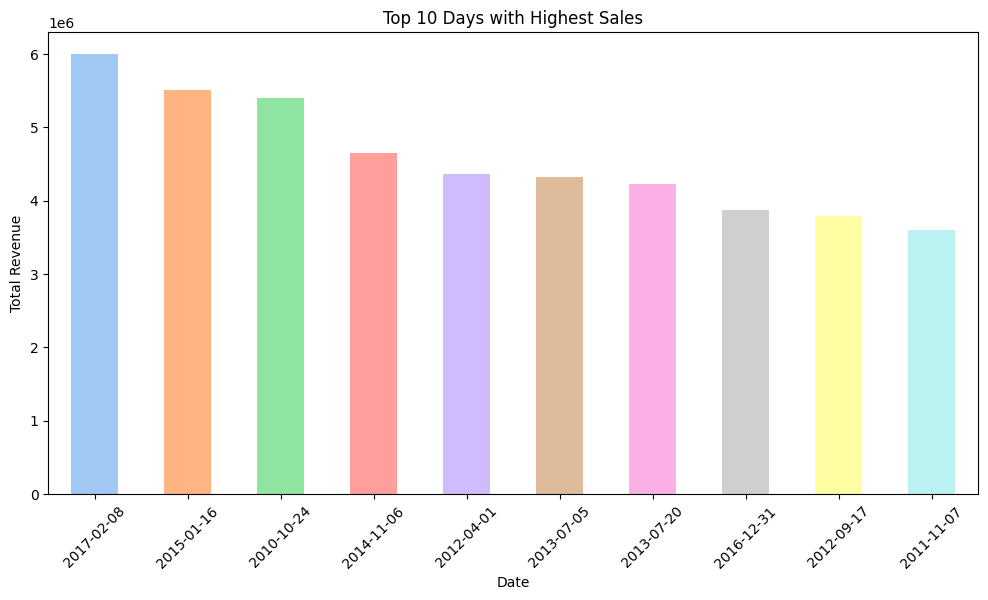

In [19]:
# Plotting the Top 10 Days with Highest Sales
colors = sns.color_palette('pastel', len(top_10_days))
plt.figure(figsize=(12, 6))
top_10_days.plot(kind='bar', color=colors)
plt.title('Top 10 Days with Highest Sales')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

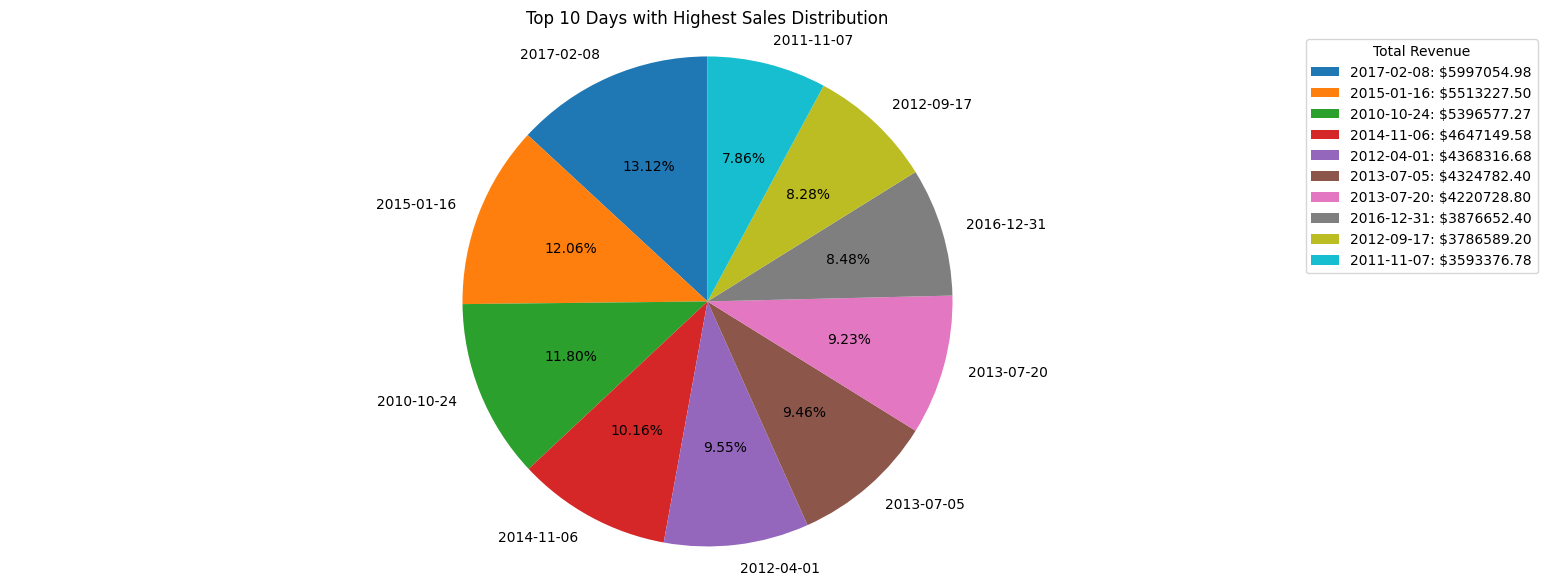

In [20]:
# Plotting a Pie Chart for the Top 10 Days with Highest Sales
plt.figure(figsize=(18, 7))
plt.pie(top_10_days, labels=top_10_days.index, autopct='%1.2f%%',startangle=90)

# Add a legend showing 'Total Revenue' for each day
legend_labels = [f"{day}: ${revenue:.2f}" for day, revenue in zip(top_10_days.index, top_10_days)]
plt.legend(legend_labels, title='Total Revenue', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.title('Top 10 Days with Highest Sales Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [21]:
# Calculate 'Total Profit' for each order
sales_data['Total Profit'] = sales_data['Total Revenue'] - sales_data['Total Cost']

# Group by 'Order Date' and sum 'Total Profit' for each day
daily_profits = sales_data.groupby('Order Date')['Total Profit'].sum()

In [22]:
# Sort the daily profits in descending order and select the top 10 days
top_10_profit_days = daily_profits.sort_values(ascending=False).head(10)

In [23]:
# Extract date without time component
top_10_profit_days.index = top_10_profit_days.index.date

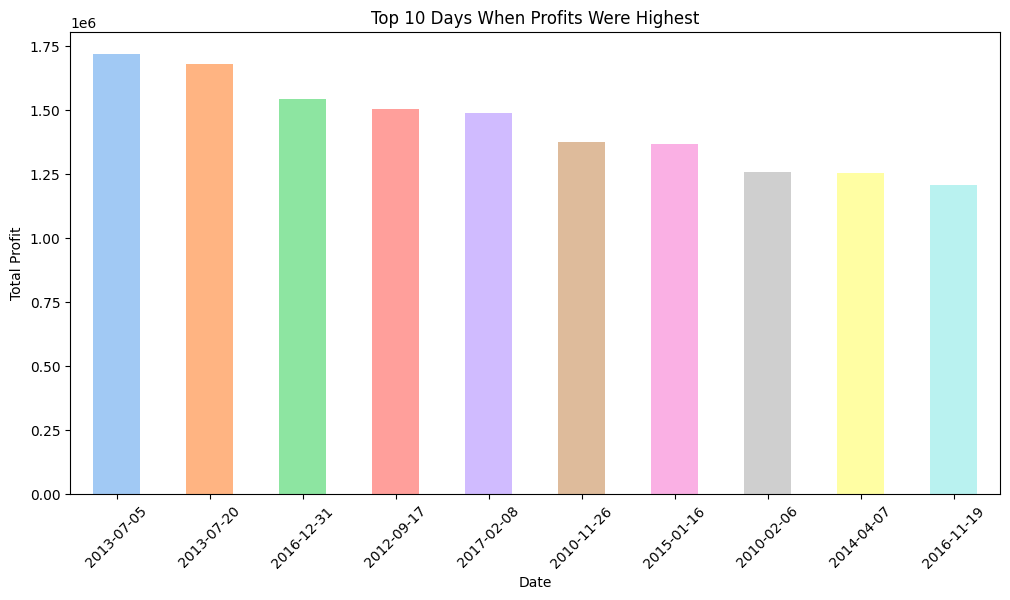

In [24]:
# Plotting a Bar Chart for the Top 10 Days When Profits Were Highest
plt.figure(figsize=(12, 6))
colors = sns.color_palette('pastel', len(top_10_profit_days))
top_10_profit_days.plot(kind='bar', color=colors)
plt.title('Top 10 Days When Profits Were Highest')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

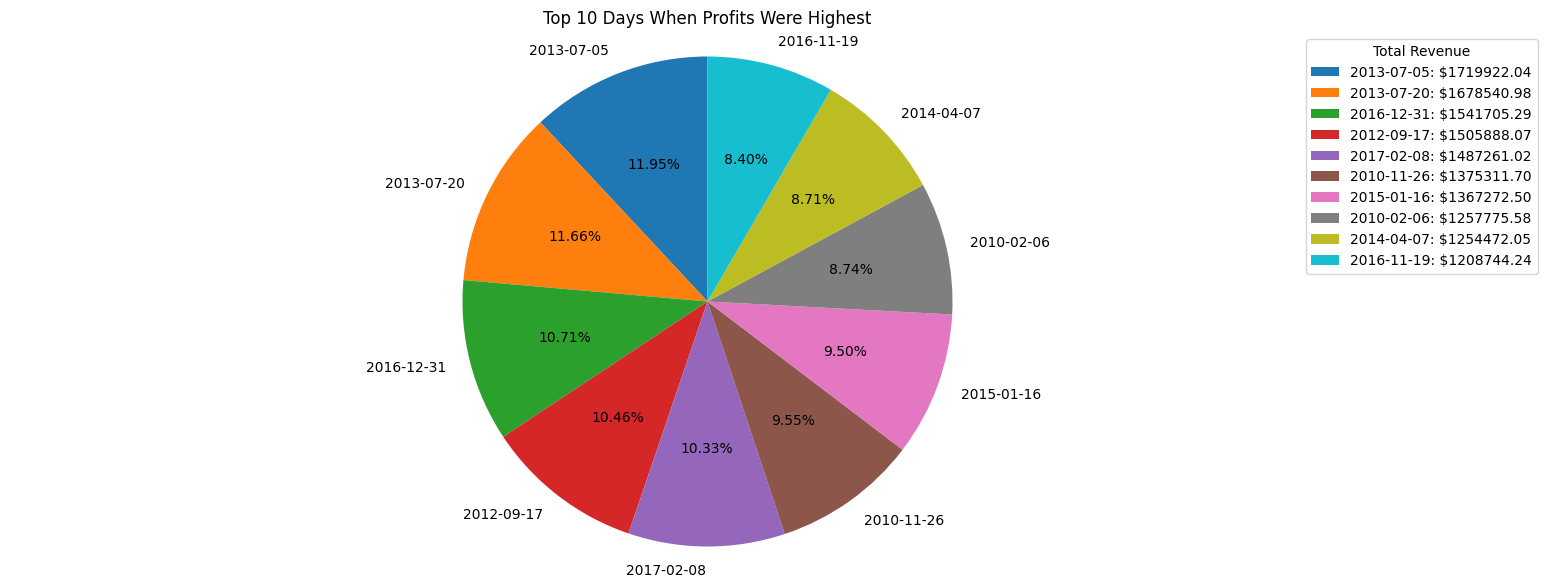

In [25]:
# Plotting a Pie Chart for the Top 10 Days When Profits Were Highest
plt.figure(figsize=(18, 7))
plt.pie(top_10_profit_days, labels=top_10_profit_days.index, autopct='%1.2f%%', startangle=90)

legend_labels = [f"{day}: ${revenue:.2f}" for day, revenue in zip(top_10_profit_days.index, top_10_profit_days)]
plt.legend(legend_labels, title='Total Revenue', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.title('Top 10 Days When Profits Were Highest')
plt.axis('equal')
plt.show()

In [26]:
# Count number of orders (unique 'Order ID') by 'Region'
orders_by_region = sales_data.groupby('Region')['Order ID'].nunique().sort_values(ascending=False)

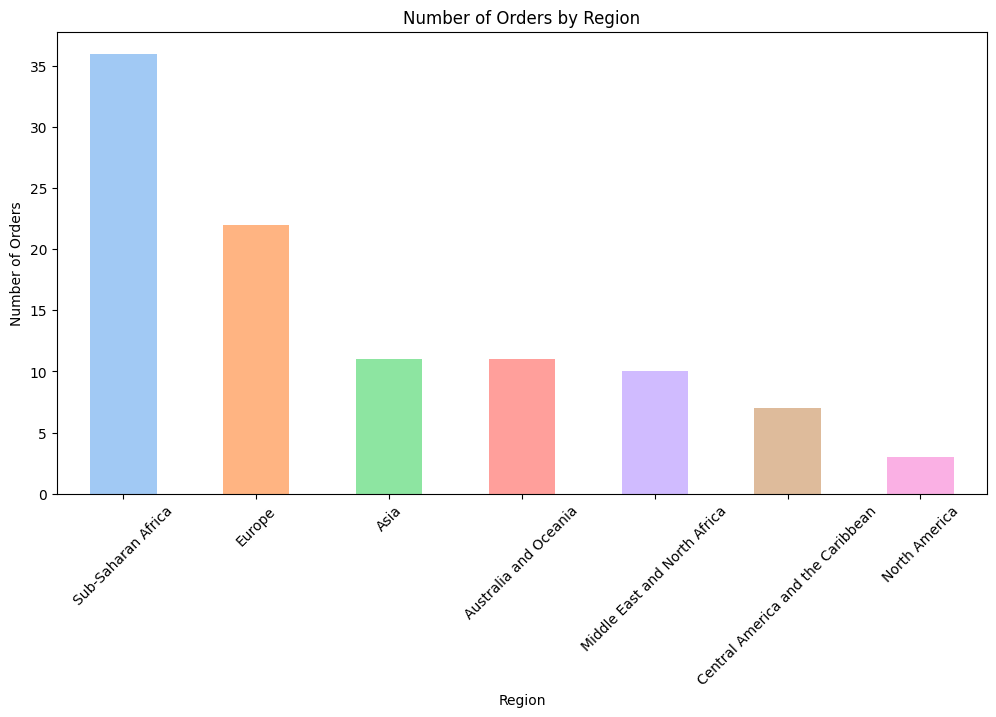

In [27]:
# Plotting a Bar Chart for Number of Orders by Region
plt.figure(figsize=(12, 6))
colors = sns.color_palette('pastel', len(orders_by_region))
orders_by_region.plot(kind='bar', color=colors)
plt.title('Number of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

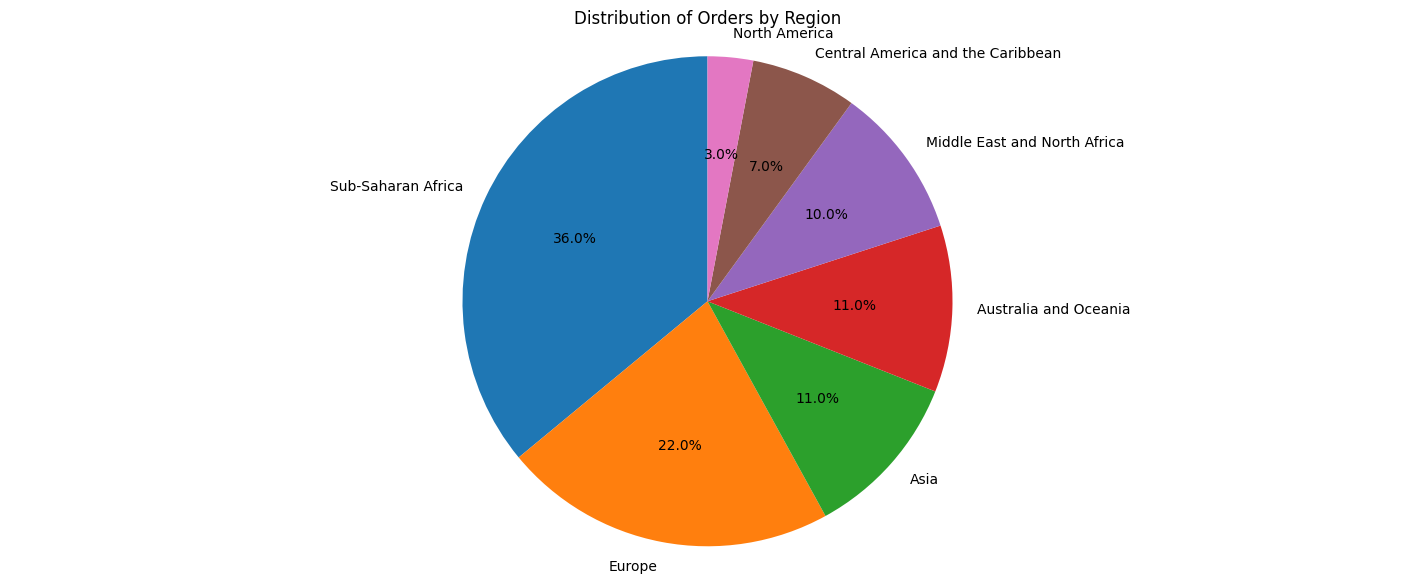

In [28]:
# Plotting a Pie Chart for Distribution of Orders by Region
plt.figure(figsize=(18, 7))
plt.pie(orders_by_region, labels=orders_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Orders by Region')
plt.axis('equal')
plt.show()

1. Sub-Saharan Africa has the highest number of orders, represented by the tallest bar.

2. Europe has the second-highest number of orders.

3. Asia has a moderate number of orders.

4. Australia and Oceania, as well as the Middle East and North Africa regions, have relatively lower numbers of orders compared to the other regions.

5. Central America and the Caribbean, along with North America, have the lowest numbers of orders among the regions shown in the chart.

6. The chart highlights the significant variation in order volumes across different regions, with Sub-Saharan Africa and Europe being the major contributors, while North America and Central America/Caribbean have the smallest order numbers.

In [29]:
# Count number of orders (unique 'Order ID') by 'Country'
orders_by_country = sales_data.groupby('Country')['Order ID'].nunique().sort_values(ascending=False)

In [30]:
# Select top 10 countries by order count
top_10_countries = orders_by_country.head(10)

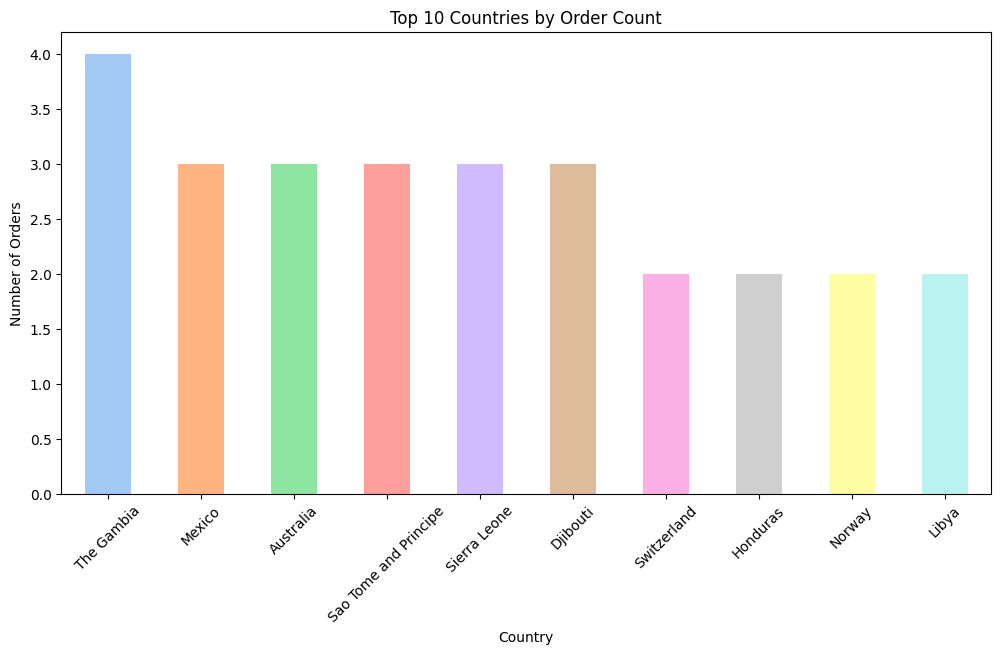

In [31]:
# Plotting a Bar Chart for Top 10 Countries by Order Count
plt.figure(figsize=(12, 6))
colors = sns.color_palette('pastel', len(orders_by_country))
top_10_countries.plot(kind='bar', color=colors)
plt.title('Top 10 Countries by Order Count')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

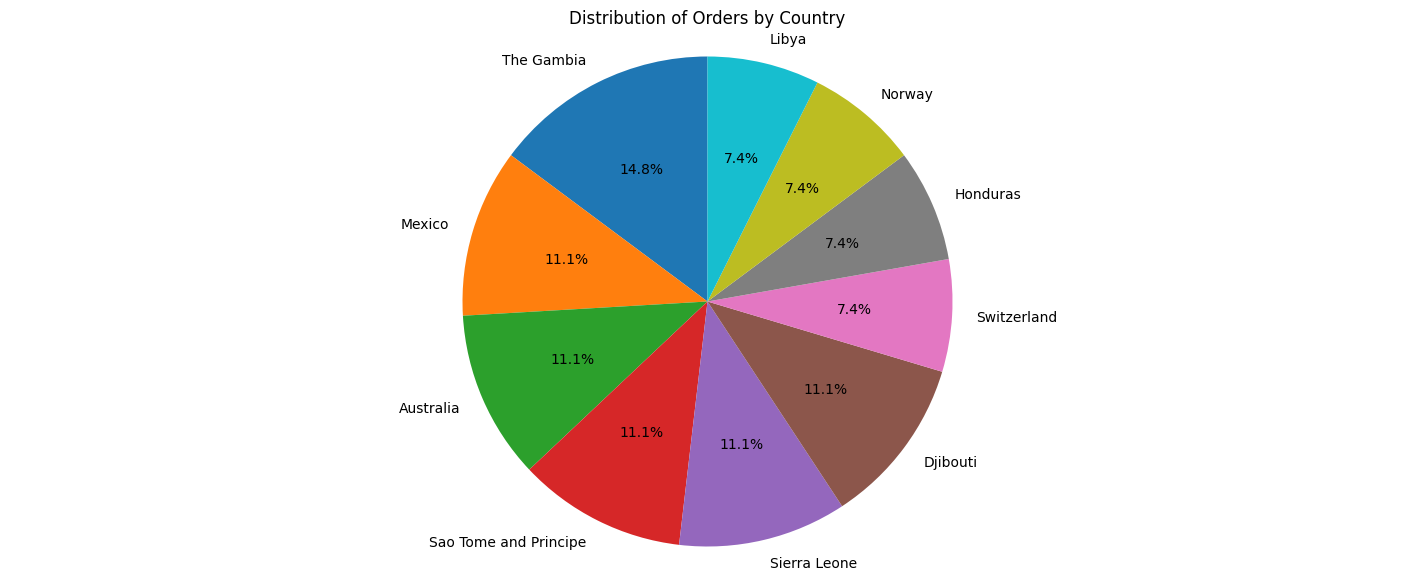

In [32]:
# Plotting a Pie Chart for Distribution of Orders by Country
plt.figure(figsize=(18, 7))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Orders by Country')
plt.axis('equal')
plt.show()

In [33]:
# Count number of orders (unique 'Order ID') by 'Item Type'
orders_by_item_type = sales_data.groupby('Item Type')['Order ID'].nunique().sort_values(ascending=False)

In [34]:
# Select top 10 items by order count
top_10_items = orders_by_item_type.head(10)

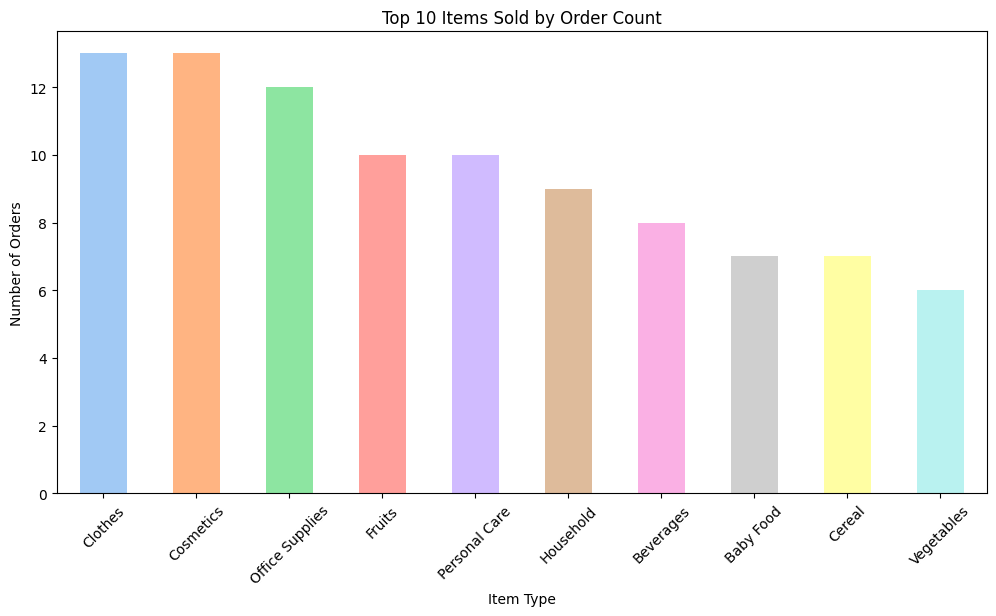

In [35]:
# Plotting a Bar Chart for Top 10 Items by Order Count
plt.figure(figsize=(12, 6))
colors = sns.color_palette('pastel', len(top_10_items))
top_10_items.plot(kind='bar', color=colors)
plt.title('Top 10 Items Sold by Order Count')
plt.xlabel('Item Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

1. Clothes have the highest number of orders among all item types.

2. Cosmetics is the second most popular item type in terms of order count.

3. Office Supplies and Fruits are the third and fourth most ordered item types, respectively.

4. Personal Care and Household items have a moderate number of orders compared to the top-ranking item types.

5. Beverages, Baby Foods, and Vegetables have relatively lower order counts among the top 10 items.

6. Cereals is the item type with the lowest number of orders among the top 10.

7. The bar heights provide a clear visual representation of the relative popularity or order volumes for each item type.

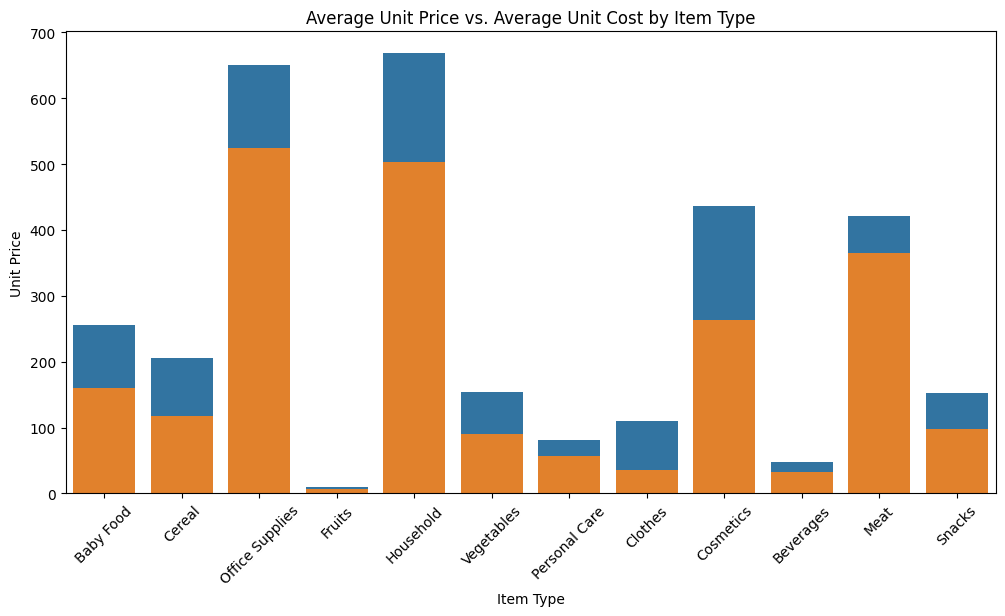

In [36]:
# @title Average Unit Price vs. Average Unit Cost by Item Type
plt.figure(figsize=(12, 6))
plt.title('Average Unit Price vs. Average Unit Cost by Item Type')
sns.barplot(x = 'Item Type', y = 'Unit Price', data = sales_data)
sns.barplot(x = 'Item Type', y = 'Unit Cost', data = sales_data)
plt.xticks(rotation=45)
plt.show()